### 온-오프라인 비지니스 분석

In [1]:
# 필수 라이브러리
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

In [2]:
df = pd.read_csv('olist_orders_dataset.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
df.shape

(99441, 8)

In [4]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# 필요한 데이터 타입 변경
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [7]:
df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [8]:
df.describe(exclude=[np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
unique,98875,90733,81018,95664,459
top,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,3,9,47,3,522
first,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [9]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# 결측치가 있는 row 출력
df_null = df[df.isnull().any(axis=1)]
df_null

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [11]:
# 특정 컬럼에 null 출력
df_col1 = df[df['order_approved_at'].isnull()]
df_col1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [12]:
# 결측치 처리
# axis=0 로우, 1= 컬럼
df_clean = df.dropna(axis=0)

# 인덱싱 재지정
df_clean.reset_index(drop=True, inplace=True)
df_clean

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
96456,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
96457,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
96458,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
96459,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [13]:
# 한 컬럼 분석
df_clean['order_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [14]:
# 주문 상태 개수
df_clean['order_status'].value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [15]:
# 주문 상태 널값 체크
df_null['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [16]:
df_null['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

In [17]:
# 취소건 시각화
A = df_clean[df_clean['order_status'] == 'canceled'].shape[0] #취소건 (6,8) 중 6개
B = df_null[df_null['order_status']== 'canceled'].shape[0] #취소건 (619,8) 중 619개

temp = pd.DataFrame(columns=['del_finished', 'del_not_finished'],
                   index=['cancel_cnt'])

# temp에 값 넣기
temp.loc['cancel_cnt', 'del_finished'] = A
temp.loc['cancel_cnt', 'del_not_finished'] = B
temp


,del_finished,del_not_finished
cancel_cnt,6,619


In [18]:
temp.T

,cancel_cnt
del_finished,6
del_not_finished,619


<Figure size 864x432 with 0 Axes>

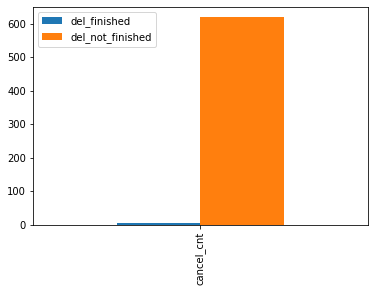

In [19]:
# 차트 그리기
# x,y축 변경 전
plt.figure(figsize=(12,6))
temp.plot(kind='bar');

<Figure size 864x432 with 0 Axes>

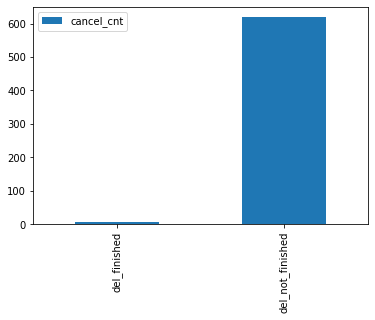

In [20]:
# 차트 그리기
# x,y축 변경
#.T로 데이터 프레임 변경 가능
plt.figure(figsize=(12,6))
temp.T.plot(kind='bar');

In [21]:
# 결측치가 제거된 상태
df_clean.describe(exclude=[np.object])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461
unique,95939,88272,80100,95649,445
top,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,3,9,47,3,507
first,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


### 새로운 컬럼 만들기

In [22]:
# 고객이 구매 후 결제까지의 시간
df_clean['pay_lead_time'] = df_clean['order_approved_at'] - df_clean['order_purchase_timestamp']
df_clean['pay_lead_time']

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
96456   0 days 00:00:00
96457   0 days 00:11:39
96458   0 days 00:17:33
96459   0 days 00:07:54
96460   0 days 14:22:58
Name: pay_lead_time, Length: 96461, dtype: timedelta64[ns]

In [23]:
# 추후 계산이 용이하도록 분단위로 변경
df_clean['pay_lead_time_m'] = df_clean['pay_lead_time'].astype('timedelta64[m]')
df_clean['pay_lead_time_m']

0          10.0
1        1842.0
2          16.0
3          17.0
4          61.0
          ...  
96456       0.0
96457      11.0
96458      17.0
96459       7.0
96460     862.0
Name: pay_lead_time_m, Length: 96461, dtype: float64

In [24]:
# 배달 리드 타임
df_clean['delivery_lead_time'] = df_clean['order_delivered_customer_date'] - df_clean['order_approved_at']
df_clean['delivery_lead_time']

0        8 days 10:17:58
1       12 days 12:03:18
2        9 days 09:11:06
3       13 days 04:42:43
4        2 days 19:56:33
              ...       
96456    8 days 05:13:56
96457   22 days 04:27:19
96458   24 days 20:20:01
96459   17 days 01:56:33
96460    7 days 01:48:02
Name: delivery_lead_time, Length: 96461, dtype: timedelta64[ns]

In [25]:
# 일 단위로 변경
df_clean['delivery_lead_time_d'] = df_clean['delivery_lead_time'].astype('timedelta64[D]')
df_clean['delivery_lead_time_d']

0         8.0
1        12.0
2         9.0
3        13.0
4         2.0
         ... 
96456     8.0
96457    22.0
96458    24.0
96459    17.0
96460     7.0
Name: delivery_lead_time_d, Length: 96461, dtype: float64

In [26]:
# 예상날짜 차이
# 배달 리드 타임
df_clean['estimated_date_miss'] = df_clean['order_estimated_delivery_date'] - df_clean['order_delivered_customer_date']
df_clean['estimated_date_miss']

0        7 days 02:34:47
1        5 days 08:32:15
2       17 days 05:53:31
3       12 days 23:31:18
4        9 days 05:42:58
              ...       
96456   10 days 08:51:59
96457    1 days 06:22:04
96458    5 days 12:35:43
96459   20 days 00:27:06
96460   17 days 10:51:30
Name: estimated_date_miss, Length: 96461, dtype: timedelta64[ns]

In [27]:
# 일 단위로 변경
df_clean['estimated_date_miss_d'] = df_clean['estimated_date_miss'].astype('timedelta64[D]')
df_clean['estimated_date_miss_d']

0         7.0
1         5.0
2        17.0
3        12.0
4         9.0
         ... 
96456    10.0
96457     1.0
96458     5.0
96459    20.0
96460    17.0
Name: estimated_date_miss_d, Length: 96461, dtype: float64

In [28]:
# 세 컬럼 모두 정수형으로 통일
df_clean['pay_lead_time_m'] = df_clean['pay_lead_time_m'].astype(int)
df_clean['delivery_lead_time_d'] = df_clean['delivery_lead_time_d'].astype(int)
df_clean['estimated_date_miss_d'] = df_clean['estimated_date_miss_d'].astype(int)

In [29]:
df_clean.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_carrier_date      datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
pay_lead_time                    timedelta64[ns]
pay_lead_time_m                            int32
delivery_lead_time               timedelta64[ns]
delivery_lead_time_d                       int32
estimated_date_miss              timedelta64[ns]
estimated_date_miss_d                      int32
dtype: object

In [30]:
df_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_d,estimated_date_miss,estimated_date_miss_d
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,10,8 days 10:17:58,8,7 days 02:34:47,7
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,1842,12 days 12:03:18,12,5 days 08:32:15,5
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,16,9 days 09:11:06,9,17 days 05:53:31,17
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,17,13 days 04:42:43,13,12 days 23:31:18,12
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,61,2 days 19:56:33,2,9 days 05:42:58,9


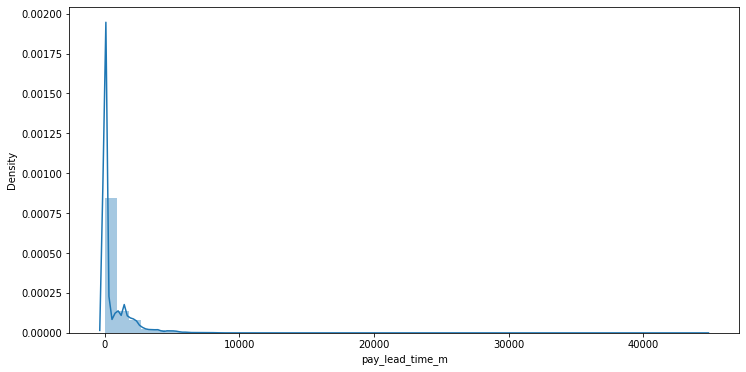

In [31]:
# 새로운 데이터로 시각화

# 결제까지 걸리는 시간
plt.figure(figsize=(12,6))
sns.distplot(df_clean['pay_lead_time_m'])
plt.show()

<AxesSubplot:xlabel='delivery_lead_time_d', ylabel='Density'>

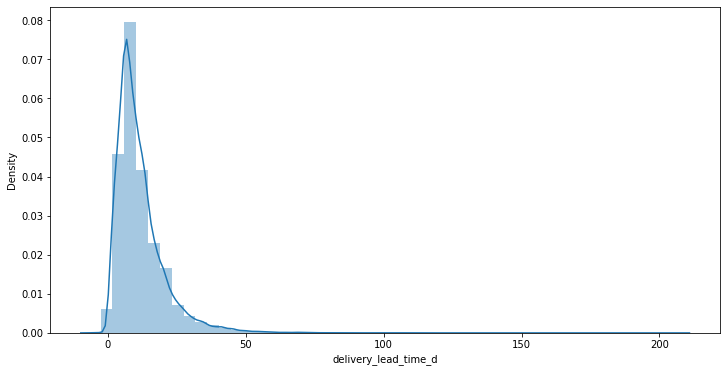

In [32]:
# 배달까지 걸리는 시간
plt.figure(figsize=(12,6))
sns.distplot(df_clean['delivery_lead_time_d'])

<AxesSubplot:xlabel='estimated_date_miss_d', ylabel='Density'>

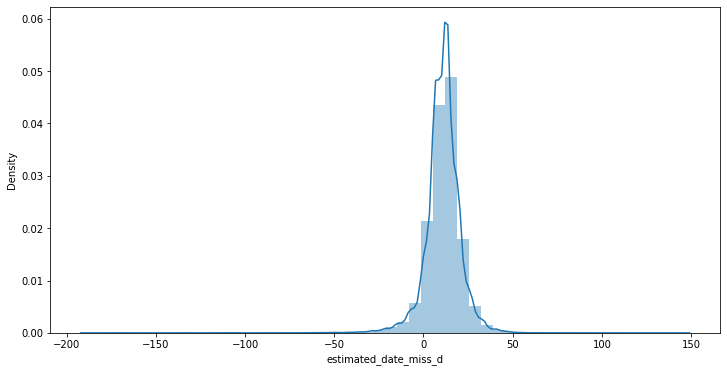

In [33]:
# 실제 걸리는 시간
plt.figure(figsize=(12,6))
sns.distplot(df_clean['estimated_date_miss_d'])

In [34]:
df_clean.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'pay_lead_time', 'pay_lead_time_m', 'delivery_lead_time',
       'delivery_lead_time_d', 'estimated_date_miss', 'estimated_date_miss_d'],
      dtype='object')

In [35]:
# 요약
df_clean[['pay_lead_time_m', 'delivery_lead_time_d','estimated_date_miss_d']].describe()

,pay_lead_time_m,delivery_lead_time_d,estimated_date_miss_d
count,96461.000000,96461.00000,96461.000000
mean,616.178777,11.64255,10.875577
std,1232.131340,9.51991,10.183476
min,0.000000,-7.00000,-189.000000
25%,12.000000,6.00000,6.000000
50%,20.000000,9.00000,11.000000
75%,871.000000,15.00000,16.000000
max,44486.000000,208.00000,146.000000


In [36]:
# 이상한 데이터 체크
df_clean[df_clean['delivery_lead_time_d']==-7]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,pay_lead_time,pay_lead_time_m,delivery_lead_time,delivery_lead_time_d,estimated_date_miss,estimated_date_miss_d
30282,bc4854efd86d9f42140c951c595d20c1,30aef21b6dd78da1334dd1164cc0b05e,delivered,2017-09-01 20:05:42,2017-09-13 22:00:51,2017-09-04 20:49:57,2017-09-06 22:15:45,2017-09-20,12 days 01:55:09,17395,-7 days +00:14:54,-7,13 days 01:44:15,13


In [37]:
# 박스플롯이로 이상치 확인
df_order_time = df_clean[['pay_lead_time_m', 'delivery_lead_time_d','estimated_date_miss_d']]
df_order_time

,pay_lead_time_m,delivery_lead_time_d,estimated_date_miss_d
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
96456,0,8,10
96457,11,22,1
96458,17,24,5
96459,7,17,20


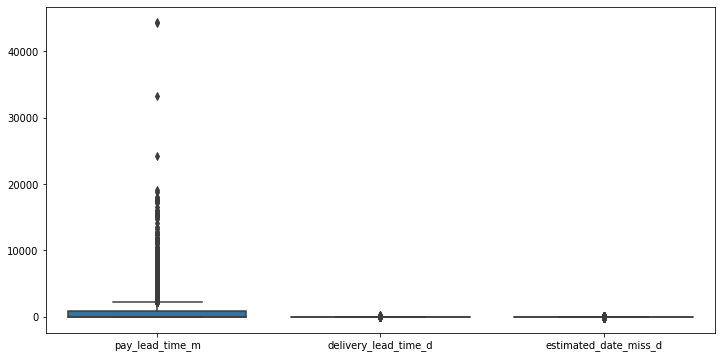

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_order_time);

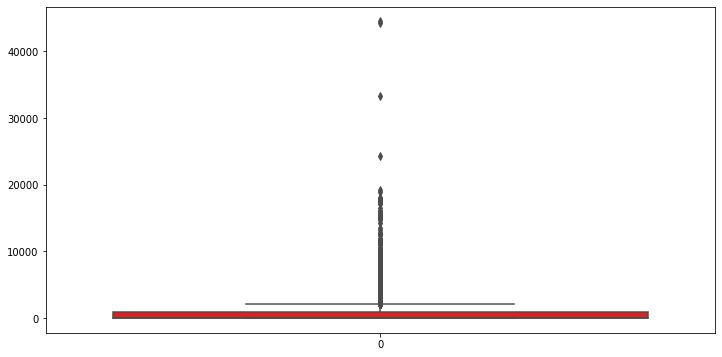

In [39]:
# 각각 찍어서 보자
plt.figure(figsize=(12,6))
sns.boxplot(data=df_order_time['pay_lead_time_m'], color='red');

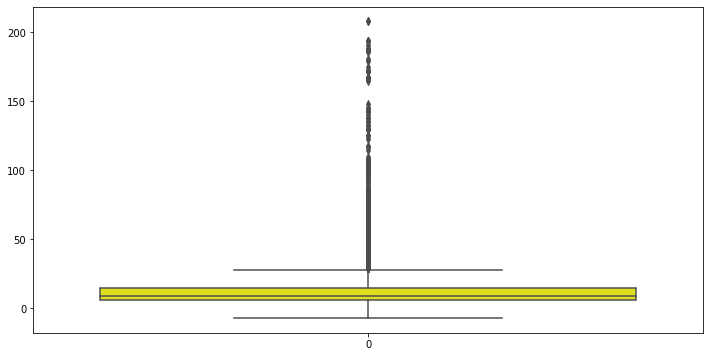

In [40]:
# 각각 찍어서 보자
plt.figure(figsize=(12,6))
sns.boxplot(data=df_order_time['delivery_lead_time_d'], color='yellow');

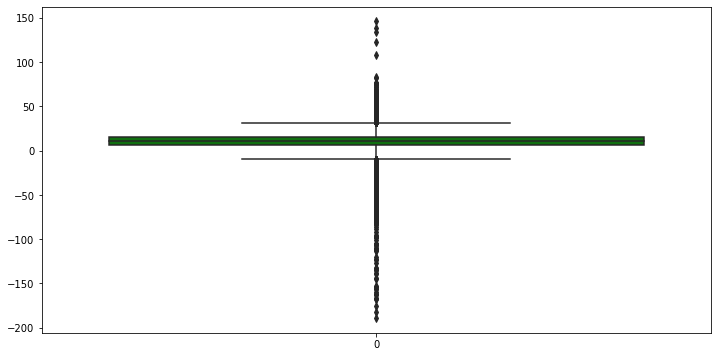

In [41]:
# 각각 찍어서 보자
plt.figure(figsize=(12,6))
sns.boxplot(data=df_order_time['estimated_date_miss_d'], color='green');

In [42]:
# 이상치 검출 코드
def outliers_iqr(data): 
    q1, q3 = np.percentile(data, [25, 75]) #박스플롯의 Q1,Q3 영역 설정
    iqr = q3 - q1 # Q1-Q3 사이의 범위
    lower_bound = q1 - (iqr * 1.5) # 그 범위보다 작거나
    upper_bound = q3 + (iqr * 1.5) # 그 범위보다 크거나
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [43]:
# pay_lead_time_m 이상치
outliers_iqr(df_order_time['pay_lead_time_m'])[0].shape[0]

8915

In [44]:
# delivery_lead_time_d 이상치
outliers_iqr(df_order_time['delivery_lead_time_d'])[0].shape[0]

4772

In [45]:
# estimated_date_miss_d 이상치
outliers_iqr(df_order_time['estimated_date_miss_d'])[0].shape[0]

4300

In [46]:
# 이상치 컬럼 생성
pay_lead_outlier_index = outliers_iqr(df_order_time['pay_lead_time_m'])[0]
del_lead_outlier_index = outliers_iqr(df_order_time['delivery_lead_time_d'])[0]
est_lead_outlier_index = outliers_iqr(df_order_time['estimated_date_miss_d'])[0]

In [47]:
# 각각의 이상치 해당값 출력
df_order_time.loc[pay_lead_outlier_index, 'pay_lead_time_m']

11       2466
14       7467
29       2326
31       2878
37       5232
         ... 
96398    5877
96409    4975
96412    2465
96413    2483
96427    7288
Name: pay_lead_time_m, Length: 8915, dtype: int32

In [48]:
# 각각의 이상치 해당값 출력
df_order_time.loc[del_lead_outlier_index, 'delivery_lead_time_d']

28       30
34       30
40       33
95       36
107      53
         ..
96161    29
96291    41
96304    30
96443    38
96452    37
Name: delivery_lead_time_d, Length: 4772, dtype: int32

In [49]:
# 각각의 이상치 해당값 출력
df_order_time.loc[est_lead_outlier_index, 'estimated_date_miss_d']

19      -12
24      -10
95      -18
97       34
107     -33
         ..
96336    33
96436    33
96437    66
96443   -22
96454    37
Name: estimated_date_miss_d, Length: 4300, dtype: int32

In [50]:
# 이상치에 대한 세 컬럼을 합치기
lead_outlier_index = np.concatenate((pay_lead_outlier_index,
                                    del_lead_outlier_index,
                                    est_lead_outlier_index), axis=None)

print(len(lead_outlier_index))
lead_outlier_index

17987


array([   11,    14,    29, ..., 96437, 96443, 96454], dtype=int64)

In [51]:
# for문을 통해 이상치가 아닌 리드타임 값의 인덱스를 추리기
lead_not_outlier_index = []

for i in df_order_time.index:
    #lead_outlier_index 에 포함 되지 않으면 추가
    if i not in lead_outlier_index:
        lead_not_outlier_index.append(i)
        
print(lead_not_outlier_index[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 20, 21, 22]


In [52]:
# 이상치가 아닌 값들 출력
df_order_time_clean = df_order_time.loc[lead_not_outlier_index]
df_order_time_clean

,pay_lead_time_m,delivery_lead_time_d,estimated_date_miss_d
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
96456,0,8,10
96457,11,22,1
96458,17,24,5
96459,7,17,20


In [53]:
# 인덱스를 다시 재 정렬
df_order_time_clean = df_order_time_clean.reset_index(drop=True)
df_order_time_clean

,pay_lead_time_m,delivery_lead_time_d,estimated_date_miss_d
0,10,8,7
1,1842,12,5
2,16,9,17
3,17,13,12
4,61,2,9
...,...,...,...
81500,0,8,10
81501,11,22,1
81502,17,24,5
81503,7,17,20


In [54]:
df_order_time_clean.describe()

,pay_lead_time_m,delivery_lead_time_d,estimated_date_miss_d
count,81505.000000,81505.000000,81505.000000
mean,309.597154,10.164113,11.645641
std,567.404995,6.056576,6.966586
min,0.000000,0.000000,-9.000000
25%,12.000000,6.000000,7.000000
50%,18.000000,9.000000,12.000000
75%,152.000000,14.000000,16.000000
max,2159.000000,28.000000,31.000000
